# Energetic Systems

# Brayton - Cycle - ideal

1. (1-2) adiabatic compression in compressor
2. (2-3) refrigeration of air ad constant pressure
3. (3-4) reversible adiabatic expansion in turbine
4. (4-1) heat conduction from air to refrigerate air at constant pressure

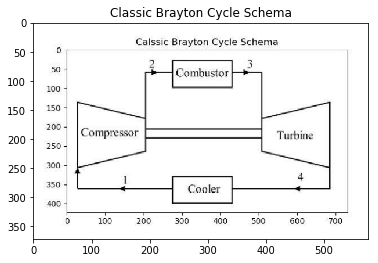

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(3)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('C:\\Users\\nicol\\Desktop\\TERMODINAMICA\\IMMAGINI\\Brayton.PNG')
#print(img)
plt.title('Classic Brayton Cycle Schema')
imgplot = plt.imshow(img)
plt.show()

In [2]:
# importing modules
import pyromat as pyro
import numpy as np

In [3]:
# DATA
air = pyro.get('ig.air')
# net power output of the turbine
Wnet = 310                    
# [bar]    pyroMat pressure units are bar
p1 = 1.013                          # [bar]  equivalent to 1 atm

# configuration of the unit pressure of the system
pyro.config['unit_pressure'] = 'bar'


# initial temperature of the system
T1 = 300.

# configuration of the unit temperature of the system
pyro.config['unit_temperature'] = 'K'


# pressure ratio of the system
pr = 10

# first entropy s1 = f(T1, p1)
s1 = air.s(T1, p1)


# configuration of the unit entropy of the system
pyro.config['unit_energy'] = 'kJ'

# second pressure p1*pressure ratio
p2 = p1*pr



# second temperature value
T2 = air.T_s(s=s1, p=p2)

# compressor entry power wc  - wc = h2 - h1  
wc = air.h(T2,p2) - air.h(T1,p1)


# T3 is important for motor efficiency
T3 = 1400

#(1-2) and (3-4) are isentropic processes --> p2=p3 and p1=p4
p4 = p1
p3 = p2



# spend temperatue qh  - qh = h3 - h2
qh = air.h(T3,p3) - air.h(T2,p2)


# third entropy value - s3 = f(T3, p3)
s3 = air.s(T3,p3)


# s4=s3  - isentropic process
s4 = s3


# fourth temperature value function of s4 and p4
T4 = air.T_s(s=s4,p=p4)



# turbine entry power is wt  --> wt = h3 - h4
wt = air.h(T3,p3) - air.h(T4,p4)



# net power
wnet = wt - wc

print('The net power of the Joule-Bryton cycle is[kJ]:  ', np.around(wnet, decimals = 2))

# determining the required mass-flow = Output Power / Spend Work
mdot = Wnet / wnet

print('The required mass flow is [kg] : ', np.around(mdot,decimals=3))

# unit matter of the system
pyro.config['unit_matter'] = 'kg'


# the efficiency of the system is n
n = wnet / qh

print ('The efficiency of the system is [%]: ', np.around(n,decimals=2))

The net power of the Joule-Bryton cycle is[kJ]:   427.09
The required mass flow is [kg] :  0.726
The efficiency of the system is [%]:  0.46


C:\Users\nicol\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


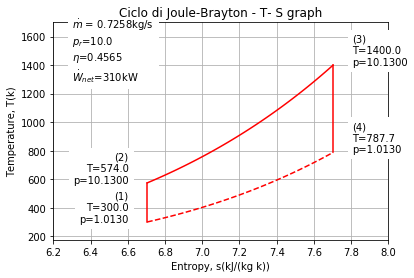

In [4]:
# Construction of the T-S diagram
# constant pressure heat function
T = np.linspace(T2,T3)
plt.plot(air.s(T=T,p=p2),T, 'r', linewidth=1.5)
T = np.linspace(T1,T4)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
# isentropic compression line
plt.plot([s1,s1],[T1,T2],'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4],'r',linewidth=1.5)

# labels
plt.axis([6.2,8,175,1700])
plt.xlabel('Entropy, s(kJ/(kg k))')
plt.ylabel('Temperature, T(k)')
plt.grid('on')

# anotations
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.4f}'.format(T1,p1),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2,'(2)\nT={:.1f}\np={:.4f}'.format(T2,p2),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.4f}'.format(T3,p3),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4,'(4)\nT={:.1f}\np={:.4f}'.format(T4,p4),
    ha='left',backgroundcolor='white')
plt.text(6.3,1300,
"""$\dot{{m}}$ = {:.4f}kg/s
$p_r$={:.1f}
$\eta$={:.4f}
$\dot{{W}}_{{net}}$={:1}kW""".format(mdot,pr,n,Wnet),
    backgroundcolor='white')

plt.title('Ciclo di Joule-Brayton - T- S graph')
plt.show()


- Building the P-V diagram

In [5]:
#plt.figure(2)
#plt.plot([x1,x2],[y1,y2]) ------------------- insert data
#plt.axis([0,2 , 0,10])
#plt.grid('on')
#plt.title('Brayton Cycle P-V Graphic')
#plt.xlabel('Volume, V (m3/kg)')
#plt.ylabel('Pressure, P (bar)')

# Rankine Cycle 

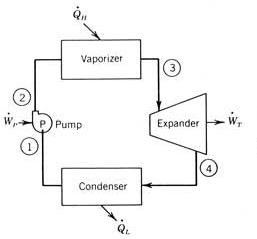

In [6]:
from IPython.display import Image
Image('C:\\Users\\nicol\\Desktop\\TERMODINAMICA\\IMMAGINI\\Rankine.PNG', width=400)

In [7]:
import pyromat as pyro
import numpy as np
import matplotlib.pyplot as plt

Ciclo Rankine:
- closed loop usually using **water** 
- low-pressure reservoir contains liquid
- liquid pumped into a high pressure boiler
- in the boiler steam is generated 
- steam occurs to a turbine
- that produces a shaft work
- than a condenser returns the liquid to be pumped


- 1 --> pump --> 2 --> boiler 3
- condenser   <-- turbine  <-- 4  <-- superheater <-

In [8]:
# Use different color codes to cange the color of the plots
color = 'r'
#color = 'b'

In [9]:
# True/False flag to deactivate the plot text
show_text = True

In [10]:
# True/False flag to allow over.plotting of previous results
clear_plots=False

In [11]:
# Liquid water reservoir at ambient pressure
p1 = 1.013                                    # [bar]
# operating pressure of the boiler 
p2 = 18.3                  # [bar]   equivalent to 250 psig
#p2 = 11.4                 # [bar]   equivalent to 150 psig

In [12]:
# How much work do we need?
# net work
Wnet = 100.  # Let's make a 100kW engine

PYroMat WARN:: Accuracy of steam saturation properties above 623.15K is
PYroMat WARN:: reduced.
PYroMat WARN:: Accuracy of steam saturation properties above 623.15K is
PYroMat WARN:: reduced.


C:\Users\nicol\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


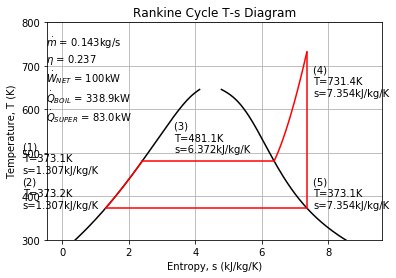

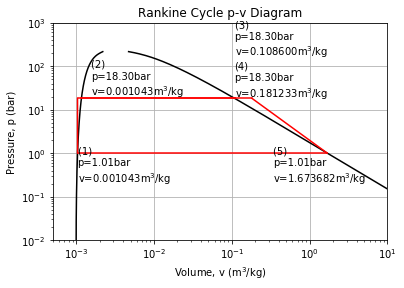

In [13]:
# Get the steam data
steam = pyro.get('mp.H2O')

# Assume the reservoir is a saturated liquid, as it would likely
# be coming out of the condenser.  In reality some supercooling
# is likely, but we will neglect it here.
# States (5) and (1) will straddle the dome
T1 = steam.Ts(p1)
p5=p1   # Since it is spanning the done, (5) and (1) share T and p
T5=T1
h1,h5 = steam.hs(p=p1,T=T1) # these are faster with T and p
s1,s5 = steam.ss(p=p1,T=T1)
d1,d5 = steam.ds(p=p1,T=T1)

# Isentropic compression of liquid water
# It is common to assume that T1=T2 since liquid is very close 
# to incompressible.  To compare results, remove the comment 
# from the second line below.
T2 = steam.T_s(p=p2,s=s1)
#T2 = T1
h2,s2,d2 = steam.hsd(T=T2,p=p2)

# The boiler will span the dome
# s2s, h2s, and T2s are the points where the process enters the dome
T3 = steam.Ts(p=p2)
p3 = p2
p2s = p2
T2s = T3
s2s,s3 = steam.ss(T=T3,p=p3) # these are faster with T and p
h2s,h3 = steam.hs(T=T3,p=p3) # specified
d2s,d3 = steam.ds(T=T3,p=p3)

# The turbine is an isentropic expansion to the low pressure
# The superheater will end with the same entropy as s5
p4 = p3
T4 = steam.T_s(s=s5,p=p4)
h4,s4,d4 = steam.hsd(T=T4,p=p4)
# State (5) is already determined


# All the states are known, now.
#
# How much work did the feed water pump do?
# This might also be approximated as volume flow times
# pressure change.
w12 = -(h2-h1)

# How much heat did the boiler add?
q23 = h3-h2

# How much heat did the superheater add?
q34 = h4-h3

# How much work did the turbine produce
w45 = -(h5-h4)

# How much heat is rejected by the condenser?
q51 = h1-h5

# calculate the net work per kg of water
wnet = w45 + w12
# calculate the total heat addition
qh = q23 + q34
# calculate the mass flow required to size the engine
mdot = Wnet/wnet
# calculate the engine's efficiency
n = wnet/qh
# heats
Qboil = q23 * mdot
Qsuper = q34 * mdot

# Generate some diagrams
# Let figure 1 be a T-s diagram
f1 = plt.figure(1)
if clear_plots:
    plt.clf()
ax1 = f1.add_subplot(111)
ax1.set_xlabel('Entropy, s (kJ/kg/K)')
ax1.set_ylabel('Temperature, T (K)')
ax1.set_title('Rankine Cycle T-s Diagram')

# Let figure 2 be a P-v diagram
f2 = plt.figure(2)
if clear_plots:
    plt.clf()
ax2 = f2.add_subplot(111)
ax2.set_ylabel('Pressure, p (bar)')
ax2.set_xlabel('Volume, v (m$^3$/kg)')
ax2.set_title('Rankine Cycle p-v Diagram')

# Generate the dome on both plots
Tt,pt = steam.triple()
Tc,pc = steam.critical()
T = np.arange(Tt,Tc,2.5)
p = steam.ps(T)
dL,dV = steam.ds(T=T,p=p)
sL,sV = steam.ss(T=T,p=p)
ax1.plot(sL,T,'k')
ax1.plot(sV,T,'k')
ax2.plot(1./dL,p,'k')
ax2.plot(1./dV,p,'k')

# Process 1-2 (isentropic compression of a liquid)
p = np.array([p1,p2])
T = np.array([T1,T2])
d = np.array([d1,d2])
s = np.array([s1,s2])
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

# Process 2-2s (constant-p heat until saturation)
T = np.linspace(T2,T2s,10)
p = p2 * np.ones(T.shape)
s = steam.s(T=T,p=p)
s[-1] = s2s # force the last points to be liquid - not vapor
d[-1] = d2s # force the last points to be liquid - not vapor
d = steam.d(T=T,p=p)
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

# Process 2s-3 (constant-p boiling)
ax1.plot([s2s,s3],[T2s,T3],color,linewidth=1.5)
ax2.plot([1./d2s, 1./d3],[p2s,p3],color,linewidth=1.5)

# Process 3-4 (constant-p superheating)
T = np.linspace(T3,T4,20)
p = p3*np.ones(T.shape)
s = steam.s(T=T,p=p)
d = steam.d(T=T,p=p)
s[0] = s3
d[0] = d3
ax1.plot(s,T,color,linewidth=1.5)
ax2.plot(1./d,p,color,linewidth=1.5)

# process 4-5 (isentropic expansion)
ax1.plot([s4,s5],[T4,T5],color,linewidth=1.5)
ax2.plot([1./d4,1./d5],[p4,p5],color,linewidth=1.5)
#p = np.linspace(p4,p5,20)
#T = np.zeros(p.shape)
#for index in range(p.size):
#    T[index],_ = steam.psolve(p=p[index],s=s4)
#d = steam.d(T=T,p=p)
#s = steam.s(T=T,p=p)
#ax1.plot(s,T,'r',linewidth=1.5)
#ax2.plot(1./d,p,'r',linewidth=1.5)

# process 5-1 (constant-p heat rejection)
# add the line across the dome
ax1.plot([s1,s5],[T1, T5],color,linewidth=1.5)
ax2.plot([1./d1,1./d5],[p1,p5],color,linewidth=1.5)


# Add some labels
if show_text:
    ax1.text(s1-2.5,T1,
    """(1) 
T={0:.1f}K
s={1:.3f}kJ/kg/K
(2)
T={2:.1f}K
s={3:.3f}kJ/kg/K""".format(float(T1),float(s1),float(T2),float(s2)))
    ax1.text(s3-3,T3+20,
    """(3) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T3),float(s3)))
    ax1.text(s4+.2,T4-100,
    """(4) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T4),float(s4)))
    ax1.text(s5+.2,T5,
    """(5) 
T={0:.1f}K
s={1:.3f}kJ/kg/K""".format(float(T5),float(s5)))
    
    v = 1./d1
    ax2.text(v,p1/5.,
    """(1) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(float(p1),float(v)))
    v = 1./d2
    ax2.text(v*1.5,p2*1.1,
    """(2) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(float(p2),float(v)))
    v = 1./d3
    ax2.text(v,p3,
    """(3) 
p={0:.2f}bar
v={1:f}m$^3$/kg
(4)
p={2:.2f}bar
v={3:f}m$^3$/kg""".format(float(p3),float(v),float(p4),1./d4))
    v = 1./d5
    ax2.text(v/5,p5/5,
    """(5) 
p={0:.2f}bar
v={1:f}m$^3$/kg""".format(p5,v))
    
    ax1.text(-.5,575,"""$\dot{{m}}$ = {0:.3f}kg/s
$\eta$ = {1:.3f}
$\dot{{W}}_{{NET}}$ = {2:.0f}kW
$\dot{{Q}}_{{BOIL}}$ = {3:.1f}kW
$\dot{{Q}}_{{SUPER}}$ = {4:.1f}kW""".format(mdot,n,Wnet,Qboil,Qsuper))

ax1.grid('on')
ax2.grid('on')
ax2.set_xscale('log')
ax2.set_yscale('log')


ax1.set_ylim([300,800])
# adjust the volume scale
ax2.set_xlim([5e-4, 10])
ax2.set_ylim([.01,1000.])

plt.show(block=False)

# **Turbo motore a gas**

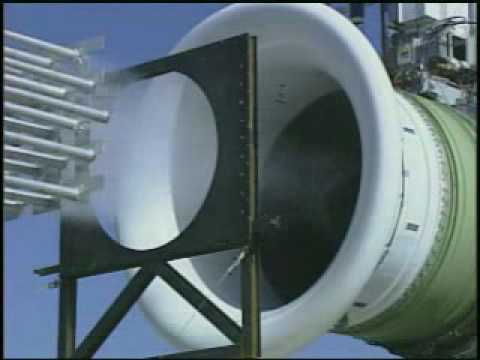

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5xlObdXF8VE')

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/J85_ge_17a_turbojet_engine.jpg/1024px-J85_ge_17a_turbojet_engine.jpg", width=300)

Turbomotore a gas che opera che opera secondo un ciclo semplice di Joule-Brayton tra la temperatura T1 = 27 celsius all'aspirazione del compressore e la tempratura T3 = 770 celsius all'ingresso della turbina. $\rho = 11$ è il rapporto di compressione. 

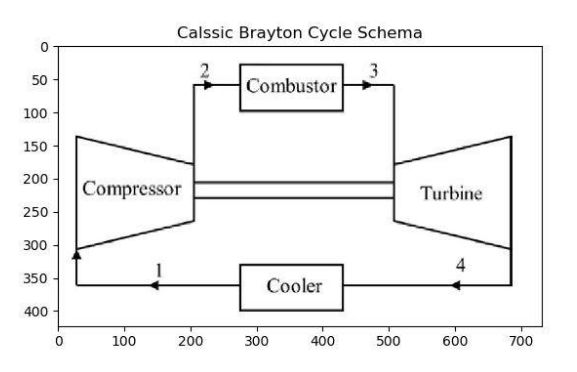

In [16]:
Image('C:\\Users\\nicol\\Desktop\\TERMODINAMICA\\IMMAGINI\\Brayton.PNG')

IPOTESI:
- trascurabili le variazioni delle portate e delle proprietà del fluido dovute all'immissione di combustibile
- fluido evolvente come un gas ideale con $c_p = 1 \frac{kJ}{kg K}$ e $\gamma = 1.4$.

Determinare il lavoro specifico netto prodotto e il rendimento termico del ciclo nel caso compressore e turbina operino adiabaticamente e reversibilmente. (in condizioni IDEALI)

In [17]:
# DATI
T1 = 300                                      # [K]    temperatura del fluido all'aspirazione del compressore 
T3 = 1043                                     # [K]    temperatura del fluido all'ingresso della turbina
rho = 11                                      # [-]    rapporto di compressione p3/p1
cp = 1                                        # [kJ/kg k] calore specifico a pressione costante del fluido
gamma = 1.4                                   # [-]    costante adiabatica

In [18]:
import numpy as np

# i rendimenti delle varie componenti nel caso ideale sono pari ad uno
eta_T = eta_C = 1
# dalla relazione della politropica T2s/T1 = (p2/p1)^((gamma-1)/gamma)
T2s = T1 * (rho)**((gamma - 1)/gamma)
print('La temperatura all\'uscita dal compressore nel caso di compressione adiabatica e reversibile è [K]: ', np.around(T2s,decimals=0 ))

La temperatura all'uscita dal compressore nel caso di compressione adiabatica e reversibile è [K]:  595.0


In [19]:
# Lavoro specifico richiestp dalla compressione - W_sc = h2s - h1 = cp(T2s - T1)
W_sc = cp * (T2s - T1) 
print('Lavoro richiesto al compressore in condizioni ideali [kJ/kg]: ', np.around(W_sc, decimals=0))

# La turbina lavora anch'essa in modo adiabatico e reversibile --> T4s/T3 = (p4/p3)**((gamma - 1)/gamma)
p4 = p1
T4s = T3*(1/rho)**((gamma -1 )/gamma)
print('La temperatura del fluido all\'uscita dalla turbina in condizioni ideali è apri a [K]: ', np.around(T4s,decimals=0))

Lavoro richiesto al compressore in condizioni ideali [kJ/kg]:  295.0
La temperatura del fluido all'uscita dalla turbina in condizioni ideali è apri a [K]:  526.0


In [20]:
# Lavoro compiuto dalla turbina reversibile --> W_tr = h3 - h4s = cp(T3 - T4s)
W_tr = cp*(T3 - T4s)
print('Il lavoro reversibile compiuto dalla turbina è pari a [kJ/kg]: ', np.around(W_tr,decimals=0))

Il lavoro reversibile compiuto dalla turbina è pari a [kJ/kg]:  517.0


In [21]:
# il lavoro netto complessivo è pari a Wnet = W_tr - W_sc
Wnet = W_tr - W_sc 
print('Il lavoro netto compiuto dal ciclo è pari a[kJ/kg]: ', np.around(Wnet,decimals=0))

Il lavoro netto compiuto dal ciclo è pari a[kJ/kg]:  222.0


In [22]:
# Il calore richiesto al combustore in condizioni reversibili è pari Qr = h3 - h2s = cp(T3 - T2s)
Q = cp*(T3 - T2s)
print('Il calore richiesto al combustore in condizioni ideali è pari a [kJ/kg]: ', np.around(Q,decimals=0))

# determinazione del rendimento di primo principio
eta_Ir = Wnet/Q
print('Il rendimento di primo principio in condizioni ideali è pari a [%]: ', np.around(eta_Ir, decimals=3)*100)

Il calore richiesto al combustore in condizioni ideali è pari a [kJ/kg]:  448.0
Il rendimento di primo principio in condizioni ideali è pari a [%]:  49.6


C:\Users\nicol\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


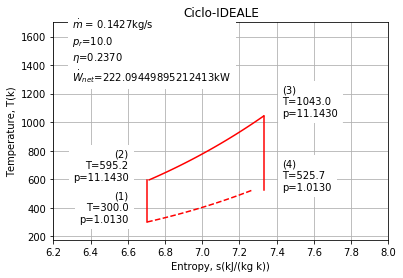

In [23]:
p1 = 1.013
p2 = rho*p1

# STATO1
s1 = air.s(T1, p1)

p3 = p2
# STATO3
s3 = air.s(T3,p3)


# Construction of the T-S diagram
T = np.linspace(T2s,T3)
plt.plot(air.s(T=T,p=p2),T, 'r', linewidth=1.5)
T = np.linspace(T1,T4s)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
# isentropic compression line
plt.plot([s1,s1],[T1,T2s],'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4s],'r',linewidth=1.5)



# labels
plt.axis([6.2,8,175,1700])
plt.xlabel('Entropy, s(kJ/(kg k))')
plt.ylabel('Temperature, T(k)')
plt.grid('on')

# anotations
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.4f}'.format(T1,p1),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2s,'(2)\nT={:.1f}\np={:.4f}'.format(T2s,p2),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.4f}'.format(T3,p3),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4s,'(4)\nT={:.1f}\np={:.4f}'.format(T4s,p4),
    ha='left',backgroundcolor='white')
plt.text(6.3,1300,
"""$\dot{{m}}$ = {:.4f}kg/s
$p_r$={:.1f}
$\eta$={:.4f}
$\dot{{W}}_{{net}}$={:1}kW""".format(mdot,pr,n,Wnet),
    backgroundcolor='white')

plt.title('Ciclo-IDEALE')
plt.show()


- Determinare il lavoro specifico netto prodotto e il rendimento termico(o di primo principio) del ciclo nel caso di compressore e turbina che operino adiabaticamente ed abbiano rendimento isoentropico rispettivamente pari a $\eta_c = 0.8$ , $\eta_t = 0.9$

In [24]:
# DATI
eta_c = 0.8
eta_t = 0.9

#  determinazione del lavoro (reale) richiesto dal compressore per comprimere il fluido evolvente
# W_c = W_cr/eta_c
W_c = W_sc/eta_c
print('Il lavoro richiesto dal compressore è pari a [kJ/kg]: ', np.around(W_c, decimals=0))


# determinazione del lavoro (reale) prodotto dalla turbina
# W_t = W_tr * eta_t
W_t = W_tr * eta_t
print('Il lavoro prodotto dalla turbina in condizioni "reali" è pari a [kJ/kg]: ', np.around(W_t, decimals=0))

# determinazione del lavoro netto 
Wnet = W_t - W_c
print('Il lavoro netto prodotto dal sistema energetico è pari a [kJ/kg]: ', np.around(Wnet,decimals=0))


Il lavoro richiesto dal compressore è pari a [kJ/kg]:  369.0
Il lavoro prodotto dalla turbina in condizioni "reali" è pari a [kJ/kg]:  466.0
Il lavoro netto prodotto dal sistema energetico è pari a [kJ/kg]:  97.0


da:
$$\frac{W_c}{m} = h_2 - h_1 = c_p(T_2 - T_1)$$
ricavo:
$$T_2 = T_1 + \frac{W_c}{m c_p}$$

In [25]:
# ricavo la temperatura T2
T2 = T1 + W_c/cp
print('La temperatura reale all\'uscita del compressore è pari a [K]: ', np.around(T2,decimals=0))

# calcolo del calore richiesto dal combustore   --> Q/m = cp(T3 - T2)
Q = cp*(T3 - T2)
print('Il calore richesto dal combustore in condizioni "reali" è pari a [kJ/kg]: ', np.around(Q, decimals=0))

# calcolo del rendimento di primo principio eta_I = Wnet/Q
eta_I = Wnet/Q
print('Il rendimento di primo principio per l\'intero sistema è apri a [%]', np.around(eta_I, decimals=3)*100)

La temperatura reale all'uscita del compressore è pari a [K]:  669.0
Il calore richesto dal combustore in condizioni "reali" è pari a [kJ/kg]:  374.0
Il rendimento di primo principio per l'intero sistema è apri a [%] 25.8


C:\Users\nicol\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


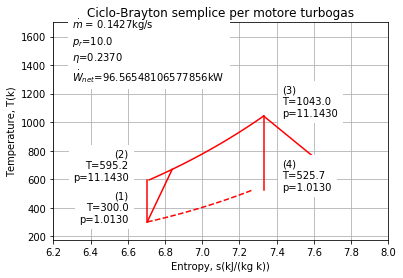

In [26]:
# Plottaggi

p1 = 1.013
p2 = rho*p1

# STATO1
s1 = air.s(T1, p1)


# STATO2
s2 = air.s(T2, p2)

p3 = p2
# STATO3
s3 = air.s(T3,p3)

# STATO4
s4 = air.s(T4,p4)


# Construction of the T-S diagram
T = np.linspace(T2s,T3)
plt.plot(air.s(T=T,p=p2),T, 'r', linewidth=1.5)
T = np.linspace(T1,T4s)
plt.plot(air.s(T=T,p=p1),T,'r--',linewidth=1.5)
# isentropic compression line
plt.plot([s1,s1],[T1,T2s],'r',linewidth=1.5)
plt.plot([s3,s3],[T3,T4s],'r',linewidth=1.5)


# non - isentropic compression line
plt.plot([s1,s2],[T1,T2],'r',linewidth=1.5)
plt.plot([s3,s4],[T3,T4],'r',linewidth=1.5)



# labels
plt.axis([6.2,8,175,1700])
plt.xlabel('Entropy, s(kJ/(kg k))')
plt.ylabel('Temperature, T(k)')
plt.grid('on')

# anotations
plt.text(s1-.1,T1,'(1)\nT={:.1f}\np={:.4f}'.format(T1,p1),
    ha='right',backgroundcolor='white')
plt.text(s1-.1,T2s,'(2)\nT={:.1f}\np={:.4f}'.format(T2s,p2),
    ha='right',backgroundcolor='white')
plt.text(s3+.1,T3,'(3)\nT={:.1f}\np={:.4f}'.format(T3,p3),
    ha='left',backgroundcolor='white')
plt.text(s3+.1,T4s,'(4)\nT={:.1f}\np={:.4f}'.format(T4s,p4),
    ha='left',backgroundcolor='white')
plt.text(6.3,1300,
"""$\dot{{m}}$ = {:.4f}kg/s
$p_r$={:.1f}
$\eta$={:.4f}
$\dot{{W}}_{{net}}$={:1}kW""".format(mdot,pr,n,Wnet),
    backgroundcolor='white')

plt.title('Ciclo-Brayton semplice per motore turbogas')
plt.show()


- L'efficienza di secondo principio del compressore che è definita come il rapporto $\frac{W_{min}^X}{W^C}$ fra la potenza meccanica minima necessaria ad una macchina ideale che operi fra le stesse condizioni di ingresso e uscita del compressore e possa interagire con un ambiente a 20 celsius ($W_{min}^C$) e la potenza meccanica fornita al compressore ($W^{C}$)

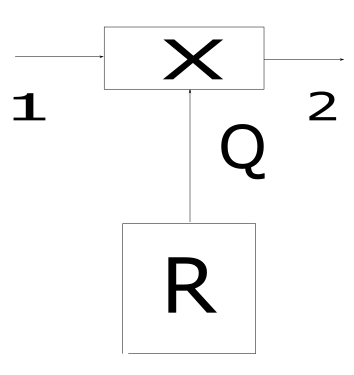

In [27]:
from IPython.display import Image
Image('C:\\Users\\nicol\\Desktop\\TERMODINAMICA\\IMMAGINI\\serb.PNG', width=200)

In [28]:
# dati
TR = 293                             # [K] temperatura ideale serbatoio

$$W_{min}^X = Ex_2 - Ex_1 = m [(h_2 - h_1) - T_R (s_2 - s_1)]$$
-
-

$$\begin{cases}
   m(h_1 - h_2) + W_{min} + Q = 0\\
   m(s_1 - s_2) + \frac{Q}{T_R} = 0
   \end{cases}$$

**gas perfetto**

$$h_2 - h_1 = c_p (T_2 - T_1) = \frac{W_c}{m} = 369 \frac{kJ}{kg}$$

$$s_2 - s_1 = c_p \ln{\frac{T_2}{T_1}} - R^* \ln{p_2}{p_1}$$

$$R^* = c_p - c_v$$
$$\implies$$
$$\frac{R^*}{c_p} = 1 * \frac{c_v}{c_p} ? 1 - \frac{1}{\gamma} = \frac{\gamma - 1}{\gamma}$$
$$\implies$$
$$R^* = c_P \frac{\gamma - 1}{\gamma}$$

$$s_2 - s_1 = c_p [\ln{\frac{T_2}{T_1}} - \frac{\gamma -1}{\gamma} \ln{\frac{p_2}{p_1}}]$$

In [29]:
# numericamente
h2_h1 = W_c
print('h2 - h1 è pari a [kJ/kg]: ',np.around(h2_h1,decimals=0))
s2_s1= cp*(np.log(T2/T1) - (gamma - 1)/gamma * np.log(p2/p1))
print('s2 - s1 è pari a [kJ/kg K]: ', np.around(s2_s1,decimals=4))

h2 - h1 è pari a [kJ/kg]:  369.0
s2 - s1 è pari a [kJ/kg K]:  0.1169


In [30]:
# Determinazione di W_min
W_min = h2_h1 - TR*s2_s1 
print (' Il lavoro ideale Wmin richiesto è pari a [kJ/kg]: ',np.around(W_min,decimals=0))

# Il rendimento di secondo principio 
eta_II = W_min/W_c
print('Il rendimento di secondo principio per l\'intero sistema è [%]: ', np.around(eta_II,decimals=4)*100)

 Il lavoro ideale Wmin richiesto è pari a [kJ/kg]:  335.0
Il rendimento di secondo principio per l'intero sistema è [%]:  90.72
